## Loading the datasets

* Important link:
https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
spi_matches=pd.read_csv('Data/spi_matches.csv')
spi_global_teams=pd.read_csv('Data/spi_global_rankings.csv')
spi_global_nations=pd.read_csv('Data/spi_global_rankings_intl.csv')


In [2]:
spi_matches


,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2016-08-12,1843,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,0.1157,...,32.4,67.7,0.0,1.0,0.97,0.63,0.43,0.45,0.00,1.05
1,2016-08-12,1843,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,0.2617,...,53.7,22.9,2.0,2.0,2.45,0.77,1.75,0.42,2.10,2.10
2,2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,...,38.1,22.2,2.0,1.0,0.85,2.77,0.17,1.25,2.10,1.05
3,2016-08-13,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,...,43.6,34.6,0.0,1.0,1.11,0.68,0.84,1.60,0.00,1.05
4,2016-08-13,2411,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,...,31.9,48.0,1.0,1.0,0.73,1.11,0.88,1.81,1.05,1.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32246,2020-05-24,1869,Spanish Primera Division,Villarreal,Eibar,73.84,73.46,0.4872,0.2588,0.2540,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32247,2020-05-24,1871,Spanish Segunda Division,Las Palmas,Extremadura UD,36.80,31.54,0.4904,0.2091,0.3004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32248,2020-05-24,1871,Spanish Segunda Division,Numancia,Tenerife,29.52,30.98,0.4367,0.2657,0.2977,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32249,2020-05-24,1871,Spanish Segunda Division,Elche,Real Oviedo,32.18,30.04,0.4768,0.2473,0.2759,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
spi_global_teams


,rank,prev_rank,name,league,off,def,spi
0,1,1.0,Manchester City,Barclays Premier League,3.29,0.22,95.22
1,2,2.0,Bayern Munich,German Bundesliga,3.22,0.36,93.30
2,3,3.0,Liverpool,Barclays Premier League,2.92,0.27,92.78
3,4,4.0,Paris Saint-Germain,French Ligue 1,2.75,0.41,89.51
4,5,5.0,Barcelona,Spanish Primera Division,2.80,0.49,88.64
...,...,...,...,...,...,...,...
624,625,627.0,Macclesfield,English League Two,0.23,2.31,6.75
625,626,624.0,Walsall,English League Two,0.20,2.24,6.72
626,627,625.0,Port Vale,English League Two,0.22,2.34,6.50
627,628,626.0,Morecambe,English League Two,0.29,2.55,6.38


In [4]:
spi_global_nations

,rank,name,confed,off,def,spi
0,1,Spain,UEFA,3.40,0.58,90.93
1,2,Brazil,CONMEBOL,2.91,0.37,90.65
2,3,Germany,UEFA,3.11,0.59,88.78
3,4,Belgium,UEFA,2.95,0.56,87.97
4,5,Argentina,CONMEBOL,2.57,0.42,86.98
...,...,...,...,...,...,...
211,212,Tuvalu,OFC,0.38,5.62,0.70
212,213,Timor-Leste,AFC,0.33,5.56,0.64
213,214,Macau,AFC,0.20,5.11,0.60
214,215,Samoa,OFC,0.20,5.78,0.34


* The spi global nations isn't very relevant to our case since we are interested in predicting scores for local teams.

In [5]:
spi_matches.shape

(32251, 22)

In [6]:
spi_matches.describe()

,league_id,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
count,32251.000000,32251.000000,32251.00000,32251.000000,32251.000000,32251.000000,32251.000000,32251.000000,21629.000000,21629.000000,25825.000000,25825.000000,14181.000000,14181.000000,14181.000000,14181.000000,14181.000000,14181.000000
mean,2135.210691,45.066728,45.01814,0.452426,0.294348,0.253226,1.528278,1.156169,31.074886,30.365537,1.532933,1.169952,1.500204,1.148975,1.416583,1.128834,1.550166,1.176223
std,707.371437,19.012871,18.99903,0.158424,0.142470,0.047001,0.428594,0.421931,25.957990,25.566858,1.282119,1.134453,0.826591,0.720711,0.651157,0.568315,1.251790,1.122378
min,1818.000000,3.880000,4.04000,0.027100,0.003200,0.000000,0.250000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1849.000000,31.310000,31.32000,0.352350,0.201300,0.235100,1.250000,0.890000,10.700000,10.300000,1.000000,0.000000,0.880000,0.610000,0.960000,0.730000,1.050000,0.000000
50%,1871.000000,42.920000,42.81000,0.444000,0.278500,0.261000,1.460000,1.110000,25.900000,25.100000,1.000000,1.000000,1.370000,1.020000,1.320000,1.040000,1.050000,1.050000
75%,2160.000000,58.520000,58.42000,0.541500,0.368400,0.282100,1.730000,1.370000,45.100000,44.200000,2.000000,2.000000,1.970000,1.540000,1.760000,1.430000,2.100000,2.100000
max,5641.000000,96.570000,96.78000,0.977500,0.899500,0.453700,4.900000,4.220000,100.000000,100.000000,10.000000,8.000000,7.070000,6.200000,6.580000,5.920000,9.150000,7.930000


* Now we will merge the spi matches with the spi_gloabl_teams in order to get the offensive rating for teams

In [7]:
spi_matches1 = pd.merge(spi_matches, spi_global_teams[['name','off']], left_on='team1', right_on="name",how='left')

In [8]:
spi_matches1.rename(columns={"off": "off_team1"})
del spi_matches1['name']

In [9]:
spi_matches2 = pd.merge(spi_matches1, spi_global_teams[['name','off']], left_on='team2', right_on="name",how='left')

In [10]:
spi_matches2

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,off_x,name,off_y
0,2016-08-12,1843,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,0.1157,...,1.0,0.97,0.63,0.43,0.45,0.00,1.05,NaN,Paris Saint-Germain,2.75
1,2016-08-12,1843,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,0.2617,...,2.0,2.45,0.77,1.75,0.42,2.10,2.10,1.85,Guingamp,1.35
2,2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,...,1.0,0.85,2.77,0.17,1.25,2.10,1.05,1.34,Leicester City,2.01
3,2016-08-13,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,...,1.0,1.11,0.68,0.84,1.60,0.00,1.05,1.90,West Bromwich Albion,1.66
4,2016-08-13,2411,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,...,1.0,0.73,1.11,0.88,1.81,1.05,1.05,1.98,Tottenham Hotspur,2.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32246,2020-05-24,1869,Spanish Primera Division,Villarreal,Eibar,73.84,73.46,0.4872,0.2588,0.2540,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.14,Eibar,1.87
32247,2020-05-24,1871,Spanish Segunda Division,Las Palmas,Extremadura UD,36.80,31.54,0.4904,0.2091,0.3004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.02,Extremadura UD,0.77
32248,2020-05-24,1871,Spanish Segunda Division,Numancia,Tenerife,29.52,30.98,0.4367,0.2657,0.2977,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.76,Tenerife,0.94
32249,2020-05-24,1871,Spanish Segunda Division,Elche,Real Oviedo,32.18,30.04,0.4768,0.2473,0.2759,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.92,Real Oviedo,0.92


* spi_matches2 is our new data frame that includes the offensive rating for team1 and team2

In [11]:
spi_matches2 = spi_matches2[np.isfinite(spi_matches2['score1'])]
spi_matches2 = spi_matches2[np.isfinite(spi_matches2['score2'])]
spi_matches2 = spi_matches2[np.isfinite(spi_matches2['off_x'])]
spi_matches2 = spi_matches2[np.isfinite(spi_matches2['off_y'])]

* Now we are going to plot score1 vs score2 for 

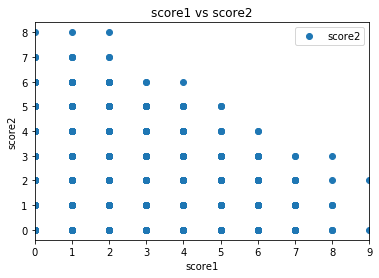

In [12]:
spi_matches2.plot(x='score1', y='score2', style='o')  
plt.title('score1 vs score2')  
plt.xlabel('score1')  
plt.ylabel('score2')  
plt.show()

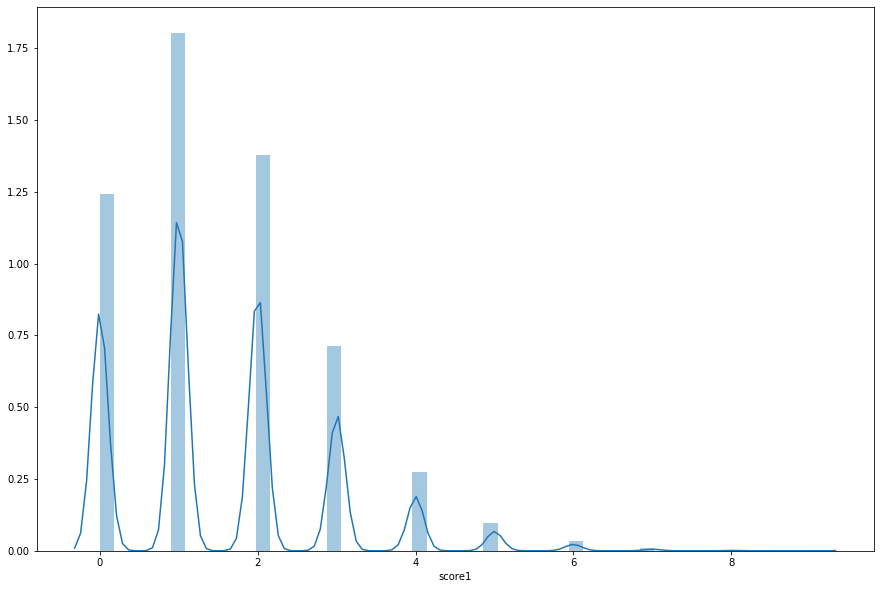

In [13]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(spi_matches2['score1'])

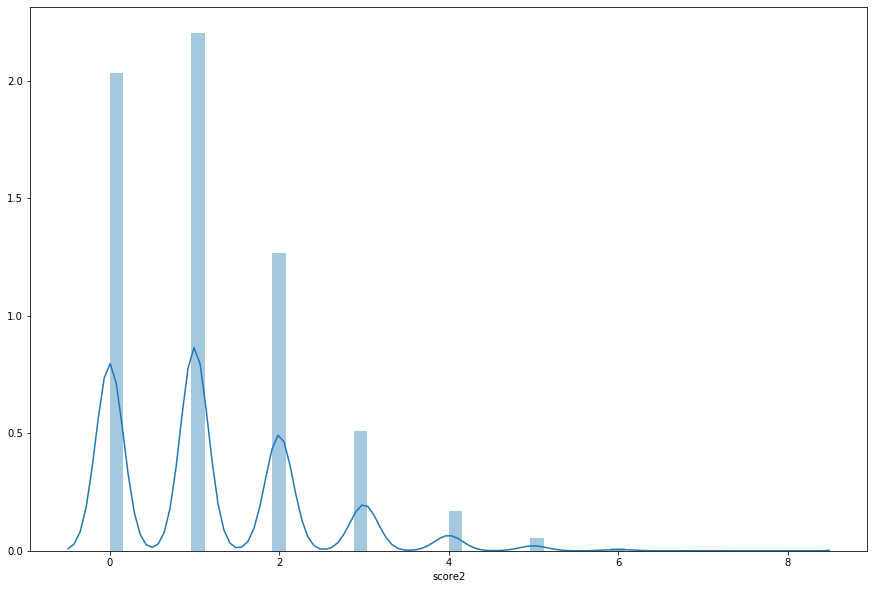

In [14]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(spi_matches2['score2'])

In [15]:
spi_matches2.shape

(21557, 25)

In [16]:
spi_matches2.isnull().any()

date           False
league_id      False
league         False
team1          False
team2          False
spi1           False
spi2           False
prob1          False
prob2          False
probtie        False
proj_score1    False
proj_score2    False
importance1     True
importance2     True
score1         False
score2         False
xg1             True
xg2             True
nsxg1           True
nsxg2           True
adj_score1      True
adj_score2      True
off_x          False
name           False
off_y          False
dtype: bool

In [17]:
spi_matches2 = spi_matches2.fillna(method='ffill')

In [18]:
spi_matches2.isnull().any()

date           False
league_id      False
league         False
team1          False
team2          False
spi1           False
spi2           False
prob1          False
prob2          False
probtie        False
proj_score1    False
proj_score2    False
importance1    False
importance2    False
score1         False
score2         False
xg1            False
xg2            False
nsxg1          False
nsxg2          False
adj_score1     False
adj_score2     False
off_x          False
name           False
off_y          False
dtype: bool

In [19]:
spi_matches2

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,off_x,name,off_y
1,2016-08-12,1843,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,0.2617,...,2.0,2.45,0.77,1.75,0.42,2.10,2.10,1.85,Guingamp,1.35
2,2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,...,1.0,0.85,2.77,0.17,1.25,2.10,1.05,1.34,Leicester City,2.01
3,2016-08-13,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,...,1.0,1.11,0.68,0.84,1.60,0.00,1.05,1.90,West Bromwich Albion,1.66
4,2016-08-13,2411,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,...,1.0,0.73,1.11,0.88,1.81,1.05,1.05,1.98,Tottenham Hotspur,2.33
5,2016-08-13,2411,Barclays Premier League,Middlesbrough,Stoke City,56.32,60.35,0.4380,0.2692,0.2927,...,1.0,1.40,0.55,1.13,1.06,1.05,1.05,1.25,Stoke City,1.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25826,2019-10-13,2105,Brasileiro Série A,Ceará,Avaí,47.90,38.49,0.6210,0.1338,0.2452,...,0.0,1.80,0.73,2.43,0.73,1.05,0.00,1.20,Avaí,1.00
25827,2019-10-13,2105,Brasileiro Série A,São Paulo,Corinthians,57.83,55.99,0.4716,0.2169,0.3116,...,0.0,1.61,0.07,0.96,0.55,1.05,0.00,1.31,Corinthians,1.22
25828,2019-10-13,2105,Brasileiro Série A,Chapecoense AF,Cruzeiro,40.41,50.30,0.3505,0.3593,0.2902,...,1.0,1.18,1.71,1.78,1.44,1.05,1.05,1.04,Cruzeiro,1.27
25829,2019-10-13,2105,Brasileiro Série A,Atletico Mineiro,Grêmio,53.88,63.47,0.3945,0.3593,0.2462,...,4.0,1.90,1.77,1.69,1.04,1.05,3.57,1.52,Grêmio,1.71
